In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
os.chdir(r'C:\Users\Administrator\Desktop\Machine Learning\ICC stuff')
data = pd.read_csv('Final project.csv', index_col=0 , error_bad_lines = False)

In [4]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [5]:
df = pd.DataFrame(data)
data.shape
print(data.Loan_Status)
data= pd.get_dummies(data, columns=['Gender'])
data= pd.get_dummies(data, columns=['Married'])
data= pd.get_dummies(data, columns=['Education'])
data= pd.get_dummies(data, columns=['Self_Employed'])
data= pd.get_dummies(data, columns=['Property_Area'])
data.Dependents = data.Dependents.fillna(0)
data.LoanAmount = data.LoanAmount.fillna(0)
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(0)
data.Credit_History = data.Credit_History.fillna(0)


Loan_ID
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
LP001011    Y
           ..
LP002978    Y
LP002979    Y
LP002983    Y
LP002984    Y
LP002990    N
Name: Loan_Status, Length: 480, dtype: object


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
data.Dependents=data.Dependents.replace("3+",3)

In [8]:
data.Loan_Status=data.Loan_Status.replace("Y",1)
data.Loan_Status=data.Loan_Status.replace("N",0)

In [9]:
y = data.Loan_Status
X = data.drop("Loan_Status",axis = 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Loan_Status",axis = 1), data.Loan_Status, test_size=0.3,random_state=22)

In [62]:
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)
clf.fit(X,y)
cvs(clf,X, y,cv=5).mean()

0.7729166666666667

In [ ]:
score=[]
for i in range(1,20,1):
    clf = DTC(max_depth = i)
    zz= cvs(rfc,X, y,cv=5).mean()
    score.append(zz)
print(max(score),(score.index(max(score))))
plt.plot(range(1,20),score)
plt.show

In [12]:
y_pred=clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
loan_status=["With Loan","No Loan"]
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=loan_status,
                    columns=loan_status)
cmdf


,With Loan,No Loan
With Loan,18,23
No Loan,2,101


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8263888888888888

[Text(167.4, 181.2, 'X[5] <= 0.5\ngini = 0.434\nsamples = 336\nvalue = [107, 229]'),
 Text(83.7, 108.72, 'X[2] <= 6698.0\ngini = 0.187\nsamples = 48\nvalue = [43, 5]'),
 Text(41.85, 36.23999999999998, 'gini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 108.72, 'X[15] <= 0.5\ngini = 0.346\nsamples = 288\nvalue = [64, 224]'),
 Text(209.25, 36.23999999999998, 'gini = 0.406\nsamples = 173\nvalue = [49, 124]'),
 Text(292.95, 36.23999999999998, 'gini = 0.227\nsamples = 115\nvalue = [15, 100]')]

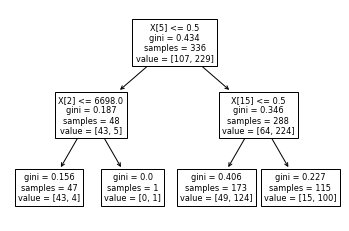

In [15]:
tree.plot_tree(clf)

In [16]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        41
           1       0.81      0.98      0.89       103

    accuracy                           0.83       144
   macro avg       0.86      0.71      0.74       144
weighted avg       0.84      0.83      0.80       144



In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
loan_status=["With Loan","No Loan"]
cm1 = (confusion_matrix(y_test,y_pred))
cmdf1 = pd.DataFrame(cm1,index=loan_status,
                    columns=loan_status)
cmdf1

,With Loan,No Loan
With Loan,25,16
No Loan,12,91


In [20]:
from sklearn.metrics import accuracy_score
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.85      0.88      0.87       103

    accuracy                           0.81       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.80      0.81      0.80       144

Accuracy: 0.8055555555555556


In [27]:
from sklearn.model_selection import cross_val_score as cvs
score=[]
for i in range(190,401,10):
    rfc = RFC(n_estimators = i)
    zz= cvs(rfc,X_train, y_train,cv=5).mean()
    score.append(zz)


0.7650570676031606 210


<function matplotlib.pyplot.show(close=None, block=None)>

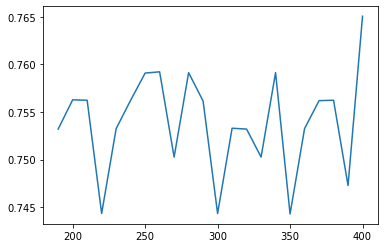

In [28]:
print(max(score),(score.index(max(score))*10))
plt.plot(range(190,401,10),score)
plt.show

In [32]:
rfc = RFC(n_estimators = 401)
cvs(rfc,X_train, y_train,cv=5).mean()

0.7651009657594381

In [33]:
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,
LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
LP001006,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
LP001011,2,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,1,0,1,0,1,0,0
LP002979,3,4106,0.0,40.0,180.0,1.0,1,0,1,0,1,1,0,1,0,1,0,0
LP002983,1,8072,240.0,253.0,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1


In [35]:
X = data.drop("Loan_Status",axis = 1)
y = data.Loan_Status

In [37]:
rfc = RFC(n_estimators = 501)
cvs(rfc,X, y,cv=5).mean()

0.7875

In [44]:
from sklearn.model_selection import cross_val_score as cvs
score=[]
for i in range(401,601,10):
    rfc = RFC(n_estimators = i)
    zz= cvs(rfc,X_train, y_train,cv=5).mean()
    score.append(zz)


0.7650570676031606 110


<function matplotlib.pyplot.show(close=None, block=None)>

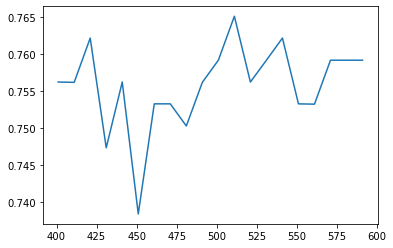

In [45]:
print(max(score),(score.index(max(score))*10))
plt.plot(range(401,601,10),score)
plt.show

In [42]:
rfc = RFC(n_estimators = 501)
cvs(rfc,X, y,cv=5).mean()

0.7895833333333333

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RFC(n_estimators = 501,random_state = 50)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=501,
                                              random_state=50),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [48]:
GS.best_params_

{'max_depth': 6}

In [49]:
GS.best_score_

0.8083333333333333

In [50]:
param_grid = {'max_features':np.arange(1,30,1)}

rfc = RFC(n_estimators = 501,random_state = 50)
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(X,y)

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\anaconda3\lib\site-packages\joblib\_parallel_backends.py", l

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=501,
                                              random_state=50),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [51]:
GS.best_params_

{'max_features': 11}

In [52]:
GS.best_score_

0.7958333333333333

In [53]:
rfc = RFC(n_estimators = 501,random_state = 50,max_depth =6,max_features=11)
cvs(rfc,X, y,cv=5).mean()

0.80625

In [54]:
param_grid = {'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators = 501,
                             random_state = 50)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=501,
                                              random_state=50),
             param_grid={'criterion': ['gini', 'entropy']})

In [55]:
GS.best_params_

{'criterion': 'gini'}

In [56]:
GS.best_score_ 

0.79375